## CAPSTONE PROJECT - CLASSIFICATION

#### IMPORT PACKAGES

In [73]:
# Import Package
import os
import pandas as pd
import numpy as np

# Package untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Package untuk cleaning, modelling, dan evaluation model
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#### READ DATASET

In [74]:
# connect colab ke g drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [75]:
path = 'gdrive/My Drive/Data Notebook/'

# Cek directory
os.listdir(path)

['salesmonthly.csv',
 'winequalityN.csv',
 'free_advertising_data.csv',
 'TestMatches_Dataset.csv',
 'reservasi_hotel.csv']

In [76]:
# Load data
df = pd.read_csv(os.path.join(path, "reservasi_hotel.csv"))
df.head()

,tipe_hotel,pembatalan,waktu_tunggu,tahun_kedatangan,bulan_kedatangan,minggu_kedatangan,tanggal_kedatangan,menginap_di_weekend,menginap_in_week_nights,dewasa,...,tipe_ruang,tipe_kamar_ditentukan,perubahan_pemesanan,tipe_deposit,company,days_in_waiting_list,tipe_customer,adr,required_car_parking_spaces,status_reservasi
0,Resort Hotel,Tidak,342,2017,July,27,1,0,0,2,...,C,C,3,No Deposit,NaN,0,Transient,0,0.0,Check-Out
1,Resort Hotel,Tidak,737,2017,July,27,1,0,0,2,...,C,C,4,No Deposit,NaN,0,Transient,0,0.0,Check-Out
2,Resort Hotel,Tidak,7,2017,July,27,1,0,1,1,...,A,C,0,No Deposit,NaN,0,Transient,75,0.0,Check-Out
3,Resort Hotel,Tidak,13,2017,July,27,1,0,1,1,...,A,A,0,No Deposit,NaN,0,Transient,75,0.0,Check-Out
4,Resort Hotel,Tidak,14,2017,July,27,1,0,2,2,...,A,A,0,No Deposit,NaN,0,Transient,98,0.0,Check-Out


#### PROBLEM STATEMENT

Klien membutuhkan machine learning untuk perusahaan bisnis property yaitu booking online untuk Hotel. Perusahaan ini berencana akan mengoptimalkan customer yang melakukan pembatalan secara tiba-tiba, sehingga status website pemesanan online dapat diperbaiki dan mengetahui pelanggan yang akan melakukan pembatalan.

#### EDA

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   tipe_hotel                             119390 non-null  object 
 1   pembatalan                             119390 non-null  object 
 2   waktu_tunggu                           119390 non-null  int64  
 3   tahun_kedatangan                       119390 non-null  int64  
 4   bulan_kedatangan                       119390 non-null  object 
 5   minggu_kedatangan                      119390 non-null  int64  
 6   tanggal_kedatangan                     119390 non-null  int64  
 7   menginap_di_weekend                    119390 non-null  int64  
 8   menginap_in_week_nights                119390 non-null  int64  
 9   dewasa                                 119390 non-null  int64  
 10  anak_anak                              119386 non-null  

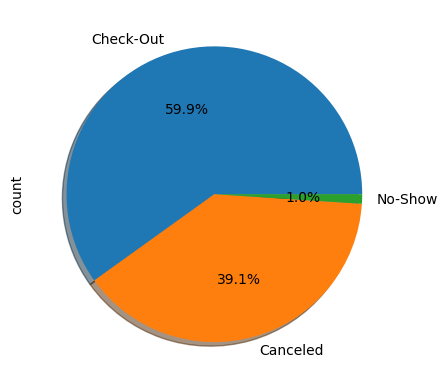

In [78]:
# Mencari perbandingan label/class
df['status_reservasi'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

In [79]:
# Menghapus baris dengan nilai "No-Show" di kolom 'status_reservasi'
df.drop(df[df['status_reservasi'] == 'No-Show'].index, inplace=True)

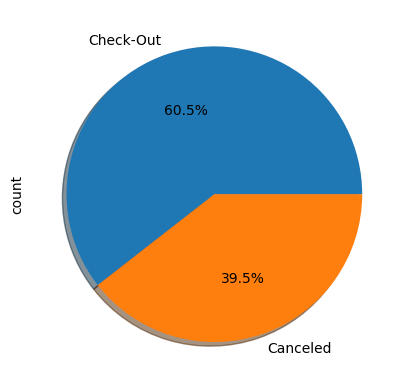

In [80]:
# cek ulang
df['status_reservasi'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

In [81]:
# Analisa deskriptif
df.describe()

,waktu_tunggu,tahun_kedatangan,minggu_kedatangan,tanggal_kedatangan,menginap_di_weekend,menginap_in_week_nights,dewasa,anak_anak,babies,tamu_berulang,pembatalan_sebelumnya,pemesanan_sebelumnya_tidak_dibatalkan,perubahan_pemesanan,company,days_in_waiting_list,adr,required_car_parking_spaces
count,118667.000000,118667.000000,118667.000000,118667.000000,118667.000000,118667.000000,118667.000000,118663.000000,118667.000000,118667.000000,118667.000000,118667.000000,118667.000000,6702.000000,118667.000000,118667.000000,69151.000000
mean,104.363024,2018.156522,27.189977,15.787304,0.928253,2.504799,1.858141,0.104009,0.007980,0.031786,0.087590,0.136795,0.220921,189.619815,2.335291,101.683998,0.066767
std,106.989994,0.707665,13.591141,8.778039,0.999010,1.908938,0.579031,0.398802,0.097646,0.175432,0.846819,1.495110,0.652213,131.679808,17.647304,50.529909,0.254326
min,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,-6.000000,0.000000
25%,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,0.000000,69.000000,0.000000
50%,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,179.000000,0.000000,94.000000,0.000000
75%,161.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,270.000000,0.000000,126.000000,0.000000
max,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,543.000000,391.000000,5400.000000,8.000000


<ipython-input-82-5c46e5efac6b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'dewasa', palette = 'Set2', data = df)
<ipython-input-82-5c46e5efac6b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'anak_anak', palette = 'Set2', data = df)
<ipython-input-82-5c46e5efac6b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'babies', palette = 'Set2', data = df)
<ipython-input-82-5c46e5efac6b>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable 

Text(0.5, 0, 'Tahun Kedatangan')

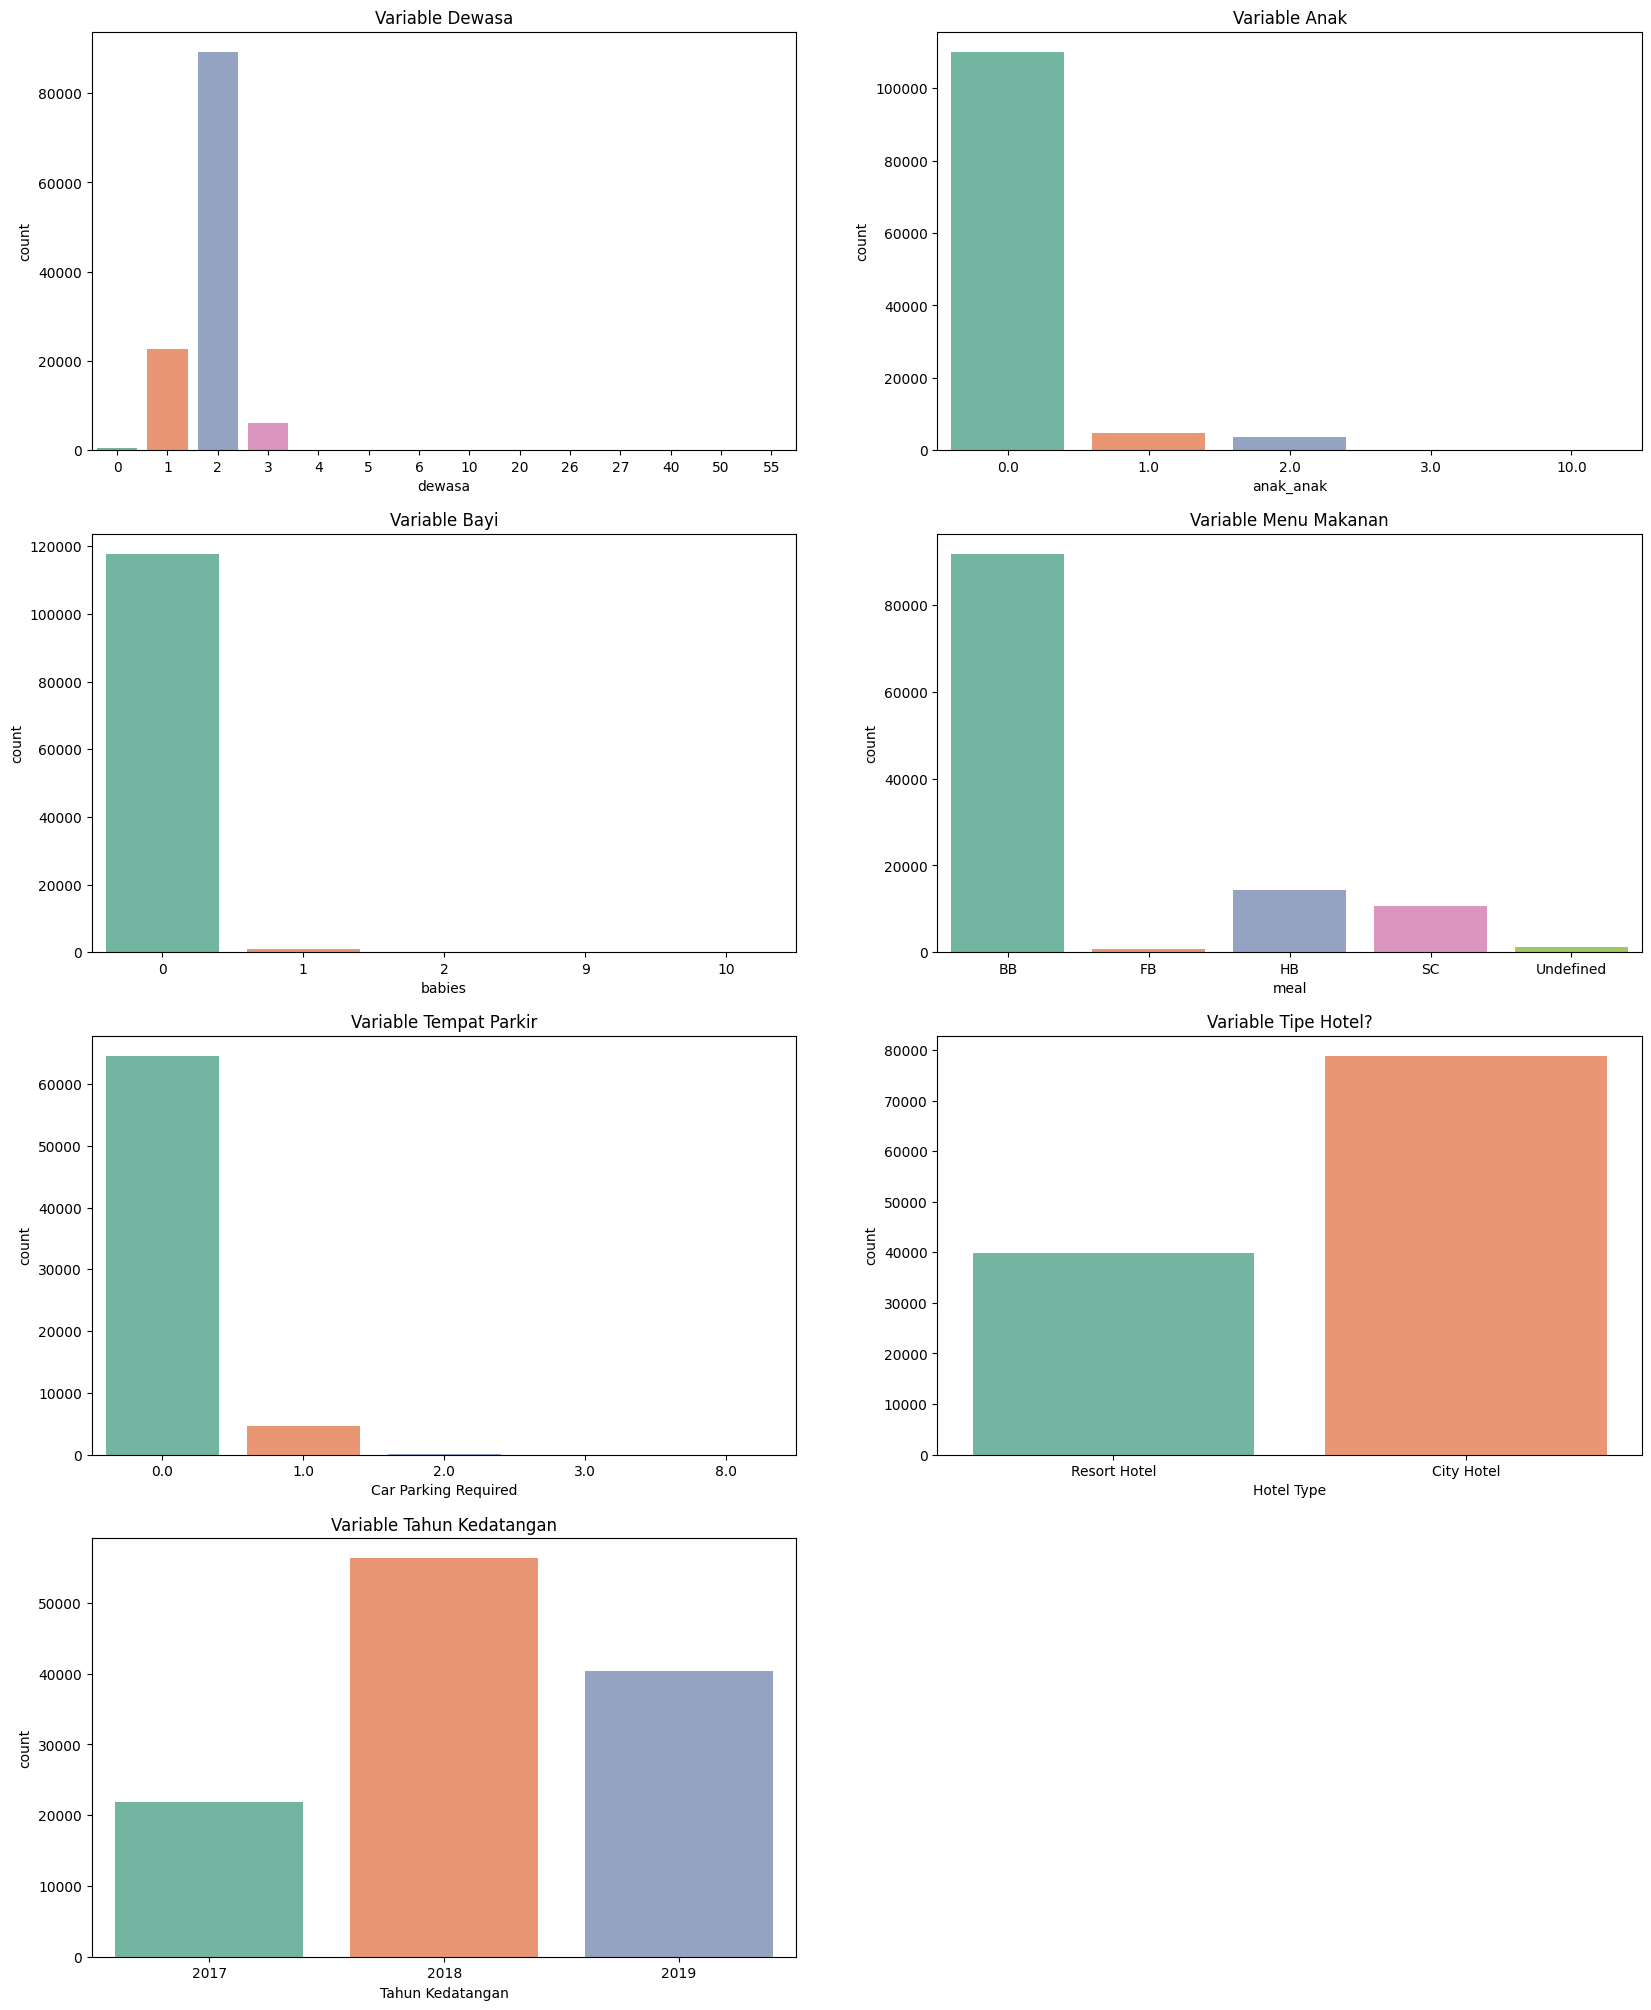

In [82]:
plt.figure(figsize=(20, 25))

plt.subplot(4,2,1)
plt.gca().set_title('Variable Dewasa')
sns.countplot(x = 'dewasa', palette = 'Set2', data = df)

plt.subplot(4,2,2)
plt.gca().set_title('Variable Anak')
sns.countplot(x = 'anak_anak', palette = 'Set2', data = df)

plt.subplot(4,2,3)
plt.gca().set_title('Variable Bayi')
sns.countplot(x = 'babies', palette = 'Set2', data = df)

plt.subplot(4,2,4)
plt.gca().set_title('Variable Menu Makanan')
sns.countplot(x = 'meal', palette = 'Set2', data = df)

plt.subplot(4,2,5)
plt.gca().set_title('Variable Tempat Parkir')
sns.countplot(x = 'required_car_parking_spaces', palette = 'Set2', data = df)
plt.gca().set_xlabel('Car Parking Required')

plt.subplot(4,2,6)
plt.gca().set_title('Variable Tipe Hotel?')
sns.countplot(x = 'tipe_hotel', palette = 'Set2', data = df)
plt.gca().set_xlabel('Hotel Type')

plt.subplot(4,2,7)
plt.gca().set_title('Variable Tahun Kedatangan')
sns.countplot(x = 'tahun_kedatangan', palette = 'Set2', data = df)
plt.gca().set_xlabel('Tahun Kedatangan')

Didapatkan bahwa lebih banyak yang menginap dengan jumlah 2 orang dewasa yang tidak memiliki anak maupun bayi, yang memilih menu makanan BB paling banyak, jumlah tempat parkir juga paling banyak 0,lebih banyak yang memilih city hotel dibandingkan dengan resort, dan pemesan terbanyak pada kedatangan di tahun 2018.

<ipython-input-83-1dded1feda2f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bulan_kedatangan', palette='Set2', data=df)
<ipython-input-83-1dded1feda2f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='market_segment', palette='Set2', data=df)
<ipython-input-83-1dded1feda2f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='tamu_berulang', palette='Set2', data=df)
<ipython-input-83-1dded1feda2f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` vari

Text(0.5, 0, 'Pembatalan Sebelumnya')

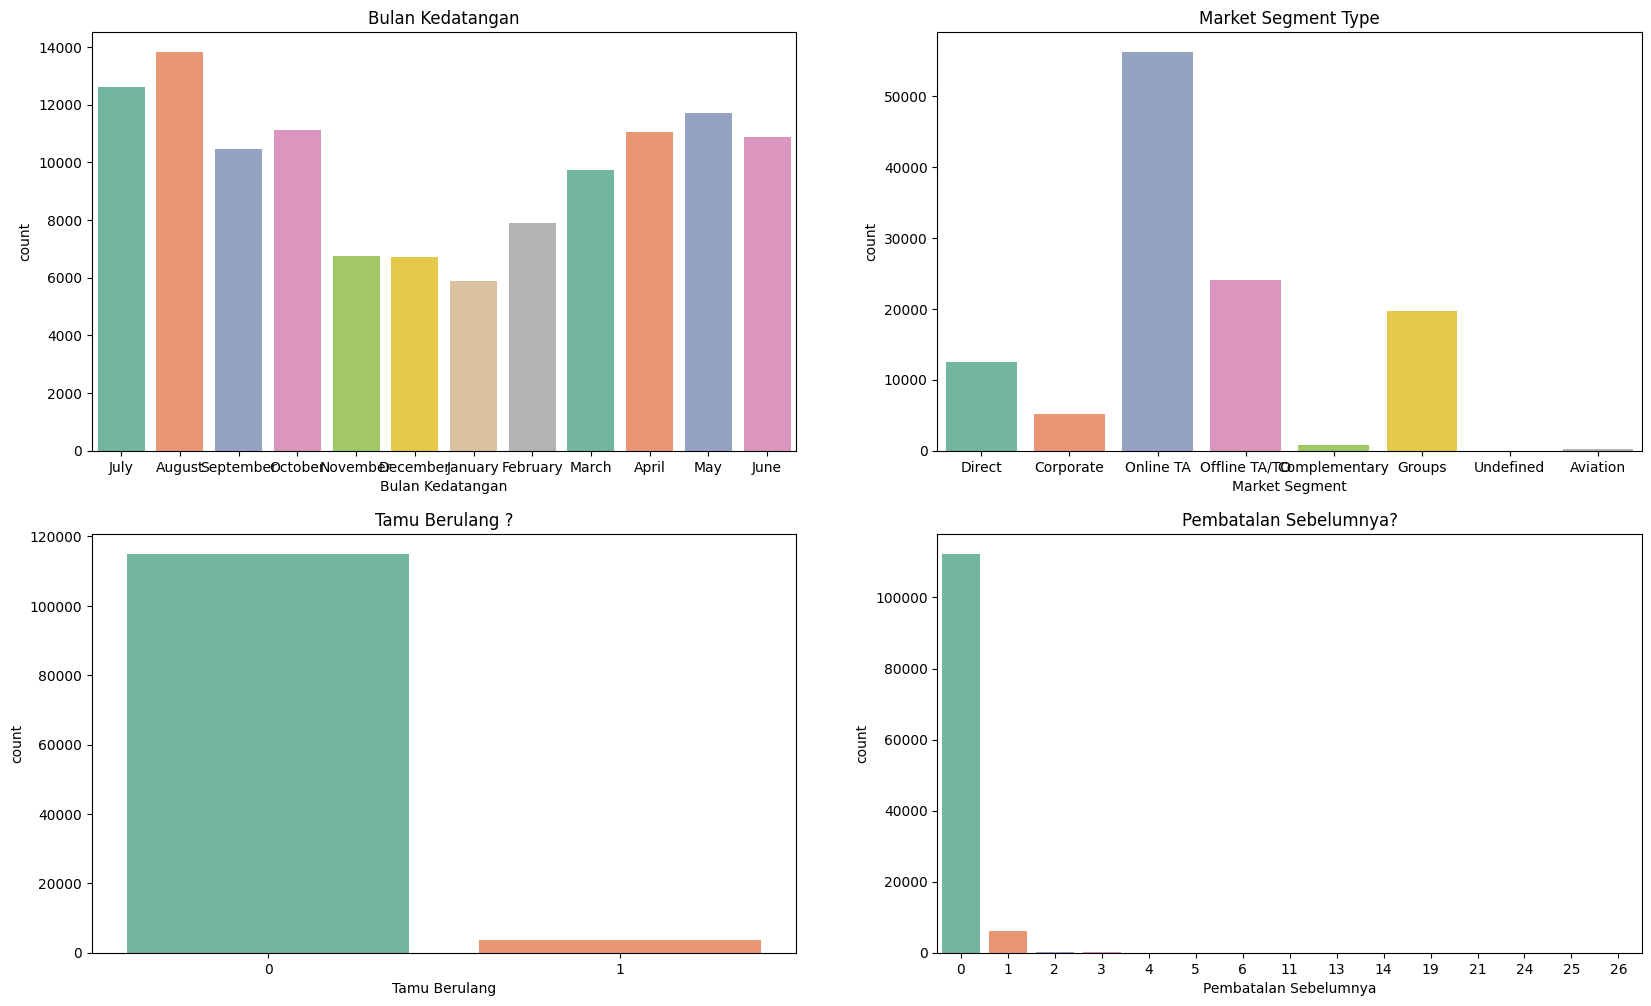

In [83]:
plt.figure(figsize = (20,25))

# Plotting Count-Plot.
plt.subplot(4, 2, 1)
plt.gca().set_title('Bulan Kedatangan')
sns.countplot(x='bulan_kedatangan', palette='Set2', data=df)
plt.gca().set_xlabel('Bulan Kedatangan')

plt.subplot(4, 2, 2)
plt.gca().set_title('Market Segment Type')
sns.countplot(x='market_segment', palette='Set2', data=df)
plt.gca().set_xlabel('Market Segment')

plt.subplot(4, 2, 3)
plt.gca().set_title('Tamu Berulang ?')
sns.countplot(x='tamu_berulang', palette='Set2', data=df)
plt.gca().set_xlabel('Tamu Berulang')

plt.subplot(4, 2, 4)
plt.gca().set_title('Pembatalan Sebelumnya?')
sns.countplot(x='pembatalan_sebelumnya', palette='Set2', data=df)
plt.gca().set_xlabel('Pembatalan Sebelumnya')

Didaptkan bahwa terdapat penurunan pada july-january dan kenaikan kembali pada bulan february-june, market segment paling banyak pada Online, paling banyak adalah first timer(0) dibandingkan tamu berulang, dan sebagian besar tidak melakukan pembatalan sebelumnya.

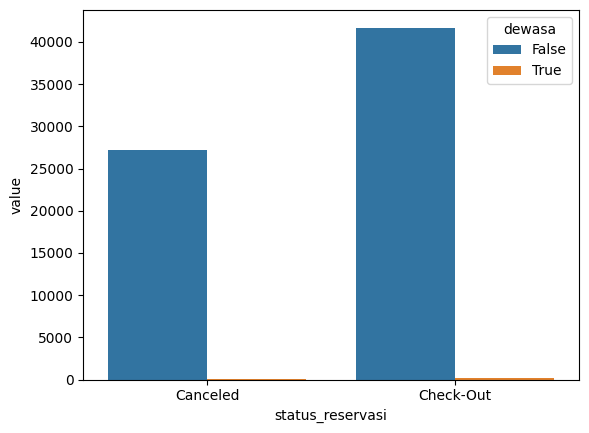

In [84]:
# Buat Crosstab antara jumlah dewasa dan status_reservasi
jumlahdewasa_status = pd.crosstab(df['status_reservasi'], (df['dewasa']==0))

# Buat hasil crosstab menjadi dataframe
dewasa_stacked = jumlahdewasa_status.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=dewasa_stacked.status_reservasi, y=dewasa_stacked.value, hue=dewasa_stacked.dewasa)
plt.show()

Dari hasil diatas didapatkan bahwa semakin banyak jumlah dewasa semakin banyak yang Check-Out (tidak batal)

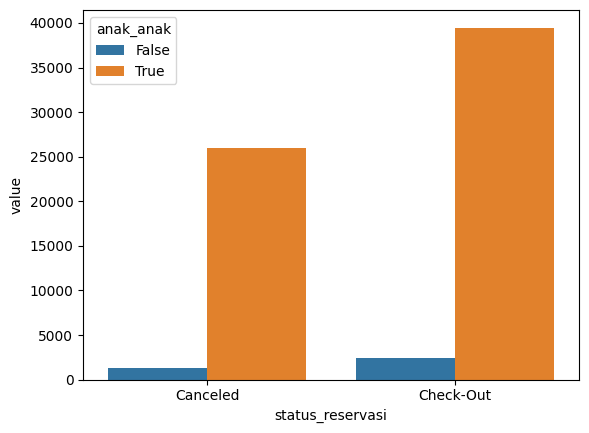

In [85]:
# Buat Crosstab antara jumlah anak-anak dan status_reservasi
jumlahanak_anak_status = pd.crosstab(df['status_reservasi'], (df['anak_anak']==0))

# Buat hasil crosstab menjadi dataframe
anak_stacked = jumlahanak_anak_status.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=anak_stacked.status_reservasi, y=anak_stacked.value, hue=anak_stacked.anak_anak)
plt.show()

dari hasil diatas dapat dilihat, tamu
yang tidak membawa anak lebih banyak Checkout  (tidak melakukan pembatalan). Namun yang melakukan pembatalan paling banyak juga yang tidak membawa anak.

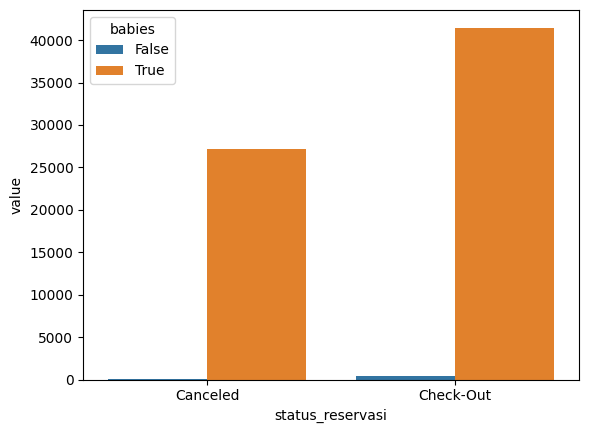

In [86]:
# Buat Crosstab antara jumlah bayi dan status_reservasi
jumlahbayi_status = pd.crosstab(df['status_reservasi'], (df['babies']==0))

# Buat hasil crosstab menjadi dataframe
bayi_stacked = jumlahbayi_status.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=bayi_stacked.status_reservasi, y=bayi_stacked.value, hue=bayi_stacked.babies)
plt.show()

dari hasil diatas didapatkan bahwa yang chekcout (tidak melakukan pembatalan) cenderung tidak memiliki bayi, namun yang melakukan pembatalan paling banyak juga yang tidak membawa bayi.

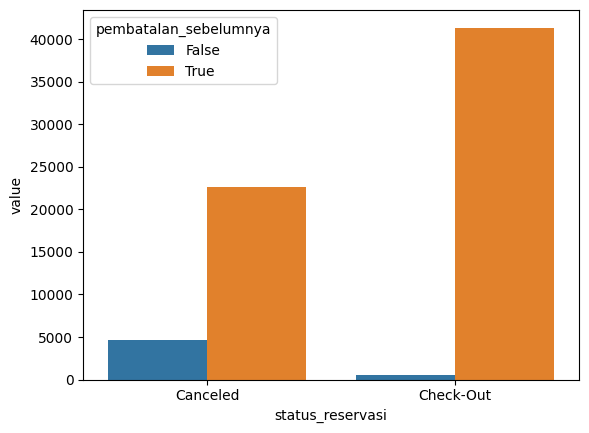

In [87]:
# Buat Crosstab antara pembatalan_sebelumnya dan status_reservasi
pembatalansebelum = pd.crosstab(df['status_reservasi'], (df['pembatalan_sebelumnya']==0))

# Buat hasil crosstab menjadi dataframe
cancelation_before_stacked = pembatalansebelum.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=cancelation_before_stacked.status_reservasi, y=cancelation_before_stacked.value, hue=cancelation_before_stacked.pembatalan_sebelumnya)
plt.show()

Didapatkan bahwa yang tidak melakukan pembatalan saat ini(check-out) juga yang sebelumnya juga tidak melakukan pembatalan.

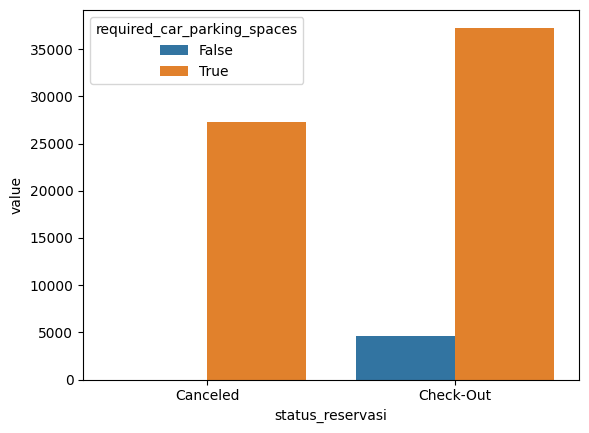

In [88]:
# Buat Crosstab antara required_car_parking_spaces dan status_reservasi
carparking = pd.crosstab(df['status_reservasi'], (df['required_car_parking_spaces']==0))

# Buat hasil crosstab menjadi dataframe
req_carparking_stacked = carparking.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=req_carparking_stacked.status_reservasi, y=req_carparking_stacked.value, hue=req_carparking_stacked.required_car_parking_spaces)
plt.show()

Didapatkan bahwa yang tidak batal (check-Out) cenderung tidak membutuhkan parking space.

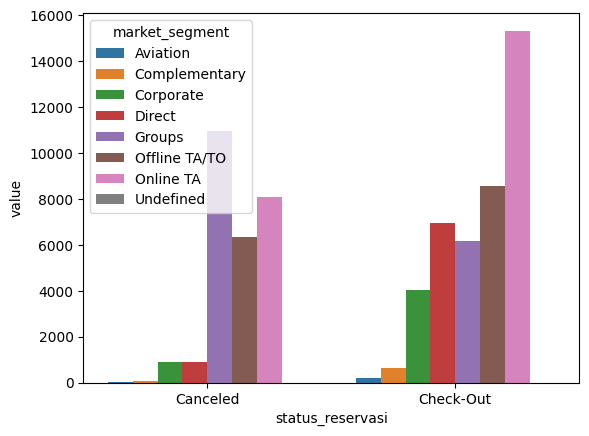

In [89]:
# Buat Crosstab antara segmen pasar dan status_reservasi
segmentpasar = pd.crosstab(df['status_reservasi'], (df['market_segment']))

# Buat hasil crosstab menjadi dataframe
segment_stacked = segmentpasar.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=segment_stacked.status_reservasi, y=segment_stacked.value, hue=segment_stacked.market_segment)
plt.show()

Dari hasil diatas didapatkan bahwa yang melakukan pembatalan paling banyak pada segmen Groups.

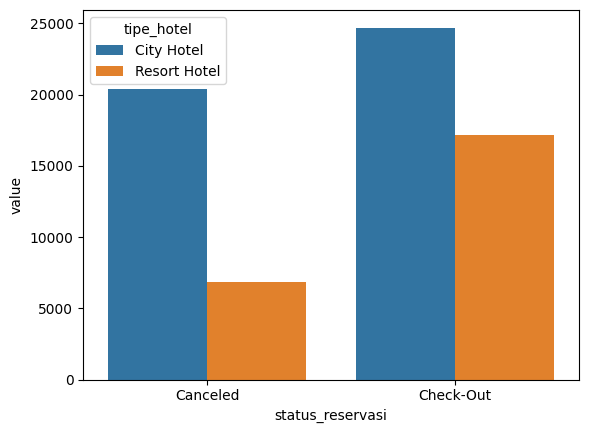

In [90]:
# Buat Crosstab antara tipe hotal dan status_reservasi
tipehotel = pd.crosstab(df['status_reservasi'], (df['tipe_hotel']))

# Buat hasil crosstab menjadi dataframe
tipehotel_stacked = tipehotel.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=tipehotel_stacked.status_reservasi, y=tipehotel_stacked.value, hue=tipehotel_stacked.tipe_hotel)
plt.show()

dari hasil diatas didapatkan bahwa yang melakukan pembatalan paling tinggi yang memilih City Hotel, namun juga dengan yang tidak melakukan pembatalan.

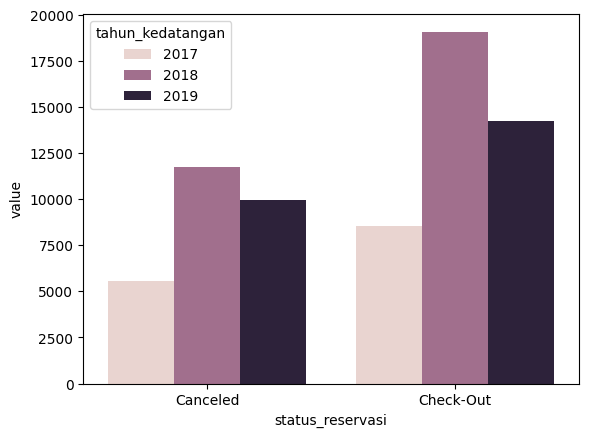

In [91]:
# Buat Crosstab antara tahun kedatangan dan status_reservasi
tahunkedatangan = pd.crosstab(df['status_reservasi'], (df['tahun_kedatangan']))

# Buat hasil crosstab menjadi dataframe
tahundatang_stacked = tahunkedatangan.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=tahundatang_stacked.status_reservasi, y=tahundatang_stacked.value, hue=tahundatang_stacked.tahun_kedatangan)
plt.show()

dari hasil diatas didaptkan yang melakukan cancelation tertinggi ada pada tahun 2018 namun pada tahun tersebut juga paling banyak yang tidak melakukan cancelation.

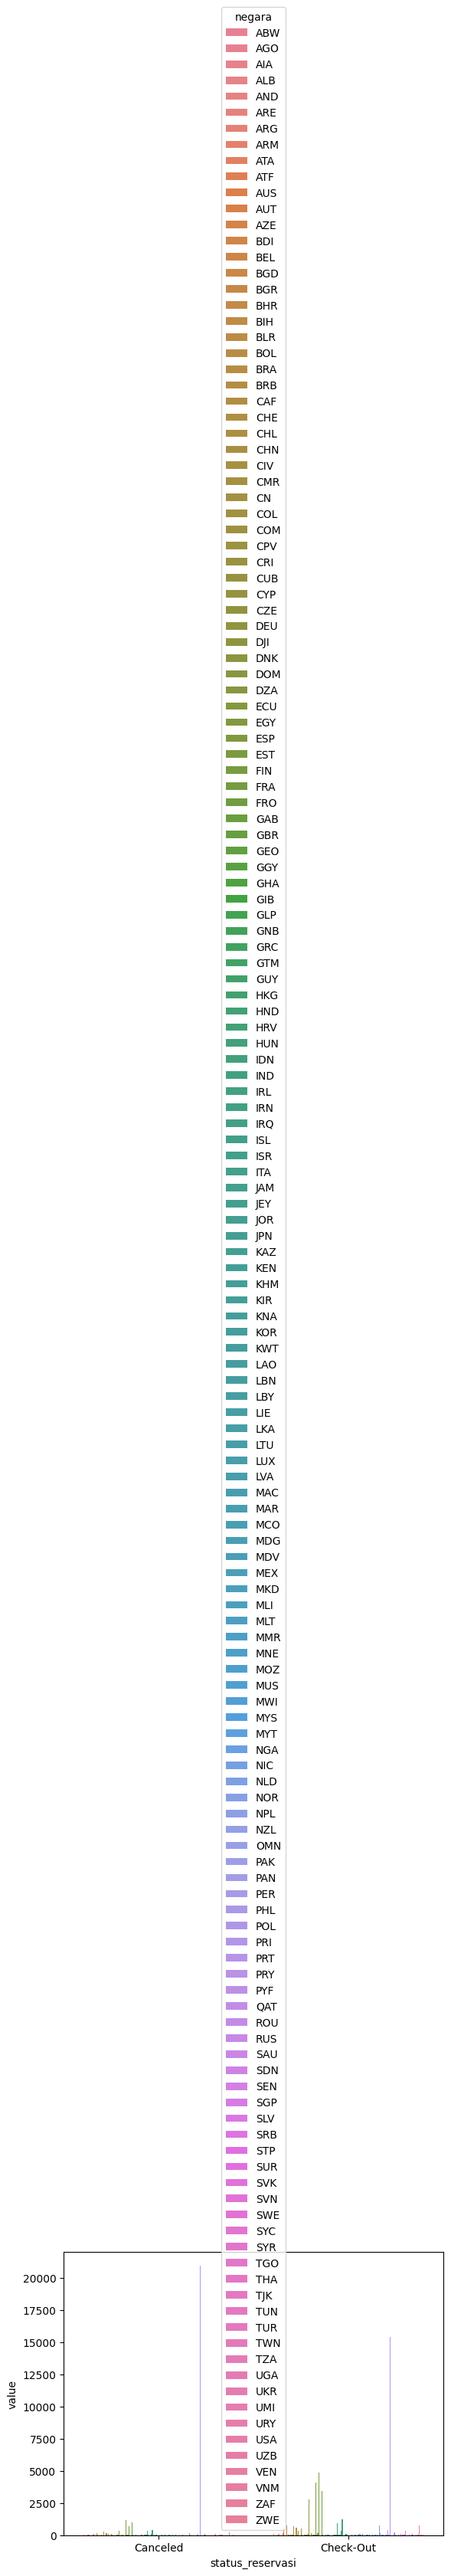

In [92]:
# Buat Crosstab antara negara dan status_reservasi
negara = pd.crosstab(df['status_reservasi'], (df['negara']))

# Buat hasil crosstab menjadi dataframe
negara_stacked = negara.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=negara_stacked.status_reservasi, y=negara_stacked.value, hue=negara_stacked.negara)
plt.show()

In [93]:
negara_cancelled = pd.crosstab(df['negara'], df['status_reservasi'])

# Memilih kolom yang hanya berisi informasi pembatalan
negara_cancelled = negara_cancelled[['Canceled']]

# Mengurutkan nilai berdasarkan jumlah pembatalan dari tertinggi ke terendah
negara_cancelled_sorted = negara_cancelled.sort_values(by='Canceled', ascending=False)
negara_cancelled_sorted.head()

status_reservasi,Canceled
negara,
PRT,20972
ESP,1157
GBR,971
FRA,698
ITA,380


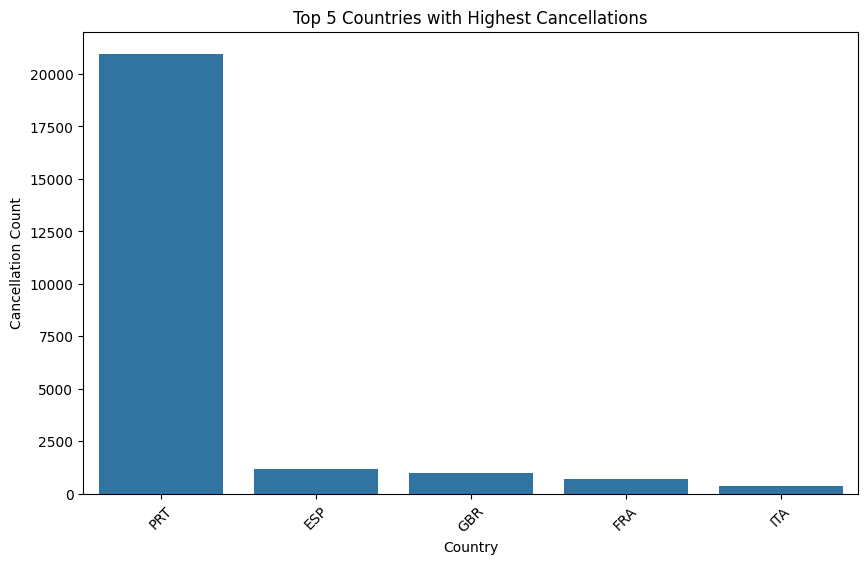

In [94]:
# TOP 5 Negara
top_countries_cancelled = negara_cancelled_sorted.head()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries_cancelled.index, y='Canceled', data=top_countries_cancelled)
plt.title('Top 5 Countries with Highest Cancellations')
plt.xlabel('Country')
plt.ylabel('Cancellation Count')
plt.xticks(rotation=45)
plt.show()

#### DATA PRE-PROCESSING

In [95]:
df.drop(columns=['company', 'pembatalan', 'tanggal_kedatangan', 'minggu_kedatangan'], inplace=True)

In [96]:
#cek missing value
df.isnull().sum()

tipe_hotel                                   0
waktu_tunggu                                 0
tahun_kedatangan                             0
bulan_kedatangan                             0
menginap_di_weekend                          0
menginap_in_week_nights                      0
dewasa                                       0
anak_anak                                    4
babies                                       0
meal                                         0
negara                                     484
market_segment                               0
tamu_berulang                                0
pembatalan_sebelumnya                        0
pemesanan_sebelumnya_tidak_dibatalkan        0
tipe_ruang                                   0
tipe_kamar_ditentukan                        0
perubahan_pemesanan                          0
tipe_deposit                                 0
days_in_waiting_list                         0
tipe_customer                                0
adr          

In [97]:
# Mengganti missing value dalam kolom 'negara' dengan modus
mode_negara = df['negara'].mode()[0]
df['negara'].fillna(mode_negara, inplace=True)

# Mengganti missing value dalam kolom 'status reservasi' dengan modus
mode_status_reservasi = df['status_reservasi'].mode()[0]
df['status_reservasi'].fillna(mode_status_reservasi, inplace=True)

# Mengganti missing value dalam kolom 'status required_car_parking_spaces' dengan 0
df['required_car_parking_spaces'].fillna(0, inplace=True)


# Mengganti missing value dalam kolom 'children' dengan 0
df['anak_anak'].fillna(0, inplace=True)


In [98]:
df.isnull().sum()

tipe_hotel                               0
waktu_tunggu                             0
tahun_kedatangan                         0
bulan_kedatangan                         0
menginap_di_weekend                      0
menginap_in_week_nights                  0
dewasa                                   0
anak_anak                                0
babies                                   0
meal                                     0
negara                                   0
market_segment                           0
tamu_berulang                            0
pembatalan_sebelumnya                    0
pemesanan_sebelumnya_tidak_dibatalkan    0
tipe_ruang                               0
tipe_kamar_ditentukan                    0
perubahan_pemesanan                      0
tipe_deposit                             0
days_in_waiting_list                     0
tipe_customer                            0
adr                                      0
required_car_parking_spaces              0
status_rese

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118667 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   tipe_hotel                             118667 non-null  object 
 1   waktu_tunggu                           118667 non-null  int64  
 2   tahun_kedatangan                       118667 non-null  int64  
 3   bulan_kedatangan                       118667 non-null  object 
 4   menginap_di_weekend                    118667 non-null  int64  
 5   menginap_in_week_nights                118667 non-null  int64  
 6   dewasa                                 118667 non-null  int64  
 7   anak_anak                              118667 non-null  float64
 8   babies                                 118667 non-null  int64  
 9   meal                                   118667 non-null  object 
 10  negara                                 118667 non-null  objec

In [100]:
#ubah tipe data
df['required_car_parking_spaces'] = df['required_car_parking_spaces'].astype(int)
df['anak_anak'] = df['anak_anak'].astype(int)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118667 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                                 Non-Null Count   Dtype 
---  ------                                 --------------   ----- 
 0   tipe_hotel                             118667 non-null  object
 1   waktu_tunggu                           118667 non-null  int64 
 2   tahun_kedatangan                       118667 non-null  int64 
 3   bulan_kedatangan                       118667 non-null  object
 4   menginap_di_weekend                    118667 non-null  int64 
 5   menginap_in_week_nights                118667 non-null  int64 
 6   dewasa                                 118667 non-null  int64 
 7   anak_anak                              118667 non-null  int64 
 8   babies                                 118667 non-null  int64 
 9   meal                                   118667 non-null  object
 10  negara                                 118667 non-null  object
 11  marke

In [102]:
# Menggabungkan jumlah tamu
df['total_guest'] = df['dewasa'] + df['anak_anak'] + df['babies']

# Menghapus baris dengan total tamu 0
df = df[df['total_guest'] != 0]

# Menampilkan dataframe setelah menghapus baris dengan total tamu 0
print(df)

          tipe_hotel  waktu_tunggu  tahun_kedatangan bulan_kedatangan  \
0       Resort Hotel           342              2017             July   
1       Resort Hotel           737              2017             July   
2       Resort Hotel             7              2017             July   
3       Resort Hotel            13              2017             July   
4       Resort Hotel            14              2017             July   
...              ...           ...               ...              ...   
119385    City Hotel            23              2019           August   
119386    City Hotel           102              2019           August   
119387    City Hotel            34              2019           August   
119388    City Hotel           109              2019           August   
119389    City Hotel           205              2019           August   

        menginap_di_weekend  menginap_in_week_nights  dewasa  anak_anak  \
0                         0                     

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118488 entries, 0 to 119389
Data columns (total 25 columns):
 #   Column                                 Non-Null Count   Dtype 
---  ------                                 --------------   ----- 
 0   tipe_hotel                             118488 non-null  object
 1   waktu_tunggu                           118488 non-null  int64 
 2   tahun_kedatangan                       118488 non-null  int64 
 3   bulan_kedatangan                       118488 non-null  object
 4   menginap_di_weekend                    118488 non-null  int64 
 5   menginap_in_week_nights                118488 non-null  int64 
 6   dewasa                                 118488 non-null  int64 
 7   anak_anak                              118488 non-null  int64 
 8   babies                                 118488 non-null  int64 
 9   meal                                   118488 non-null  object
 10  negara                                 118488 non-null  object
 11  marke

In [104]:
#label encorder

kategori = ['tipe_hotel','bulan_kedatangan','meal','negara','market_segment','tipe_ruang', 'tipe_kamar_ditentukan','tipe_deposit','tipe_customer', 'status_reservasi','tahun_kedatangan']
df_cat = df[kategori]
df_cat.head()

,tipe_hotel,bulan_kedatangan,meal,negara,market_segment,tipe_ruang,tipe_kamar_ditentukan,tipe_deposit,tipe_customer,status_reservasi,tahun_kedatangan
0,Resort Hotel,July,BB,PRT,Direct,C,C,No Deposit,Transient,Check-Out,2017
1,Resort Hotel,July,BB,PRT,Direct,C,C,No Deposit,Transient,Check-Out,2017
2,Resort Hotel,July,BB,GBR,Direct,A,C,No Deposit,Transient,Check-Out,2017
3,Resort Hotel,July,BB,GBR,Corporate,A,A,No Deposit,Transient,Check-Out,2017
4,Resort Hotel,July,BB,GBR,Online TA,A,A,No Deposit,Transient,Check-Out,2017


In [105]:
# Ubah kedalam bentuk numerik
encoded_data = LabelEncoder()

for feature in kategori:
        if feature in df.columns.values:
            df[feature] = encoded_data.fit_transform(df[feature])

df.head()

,tipe_hotel,waktu_tunggu,tahun_kedatangan,bulan_kedatangan,menginap_di_weekend,menginap_in_week_nights,dewasa,anak_anak,babies,meal,...,tipe_ruang,tipe_kamar_ditentukan,perubahan_pemesanan,tipe_deposit,days_in_waiting_list,tipe_customer,adr,required_car_parking_spaces,status_reservasi,total_guest
0,1,342,0,5,0,0,2,0,0,0,...,2,2,3,0,0,2,0,0,1,2
1,1,737,0,5,0,0,2,0,0,0,...,2,2,4,0,0,2,0,0,1,2
2,1,7,0,5,0,1,1,0,0,0,...,0,2,0,0,0,2,75,0,1,1
3,1,13,0,5,0,1,1,0,0,0,...,0,0,0,0,0,2,75,0,1,1
4,1,14,0,5,0,2,2,0,0,0,...,0,0,0,0,0,2,98,0,1,2


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118488 entries, 0 to 119389
Data columns (total 25 columns):
 #   Column                                 Non-Null Count   Dtype
---  ------                                 --------------   -----
 0   tipe_hotel                             118488 non-null  int64
 1   waktu_tunggu                           118488 non-null  int64
 2   tahun_kedatangan                       118488 non-null  int64
 3   bulan_kedatangan                       118488 non-null  int64
 4   menginap_di_weekend                    118488 non-null  int64
 5   menginap_in_week_nights                118488 non-null  int64
 6   dewasa                                 118488 non-null  int64
 7   anak_anak                              118488 non-null  int64
 8   babies                                 118488 non-null  int64
 9   meal                                   118488 non-null  int64
 10  negara                                 118488 non-null  int64
 11  market_segment    

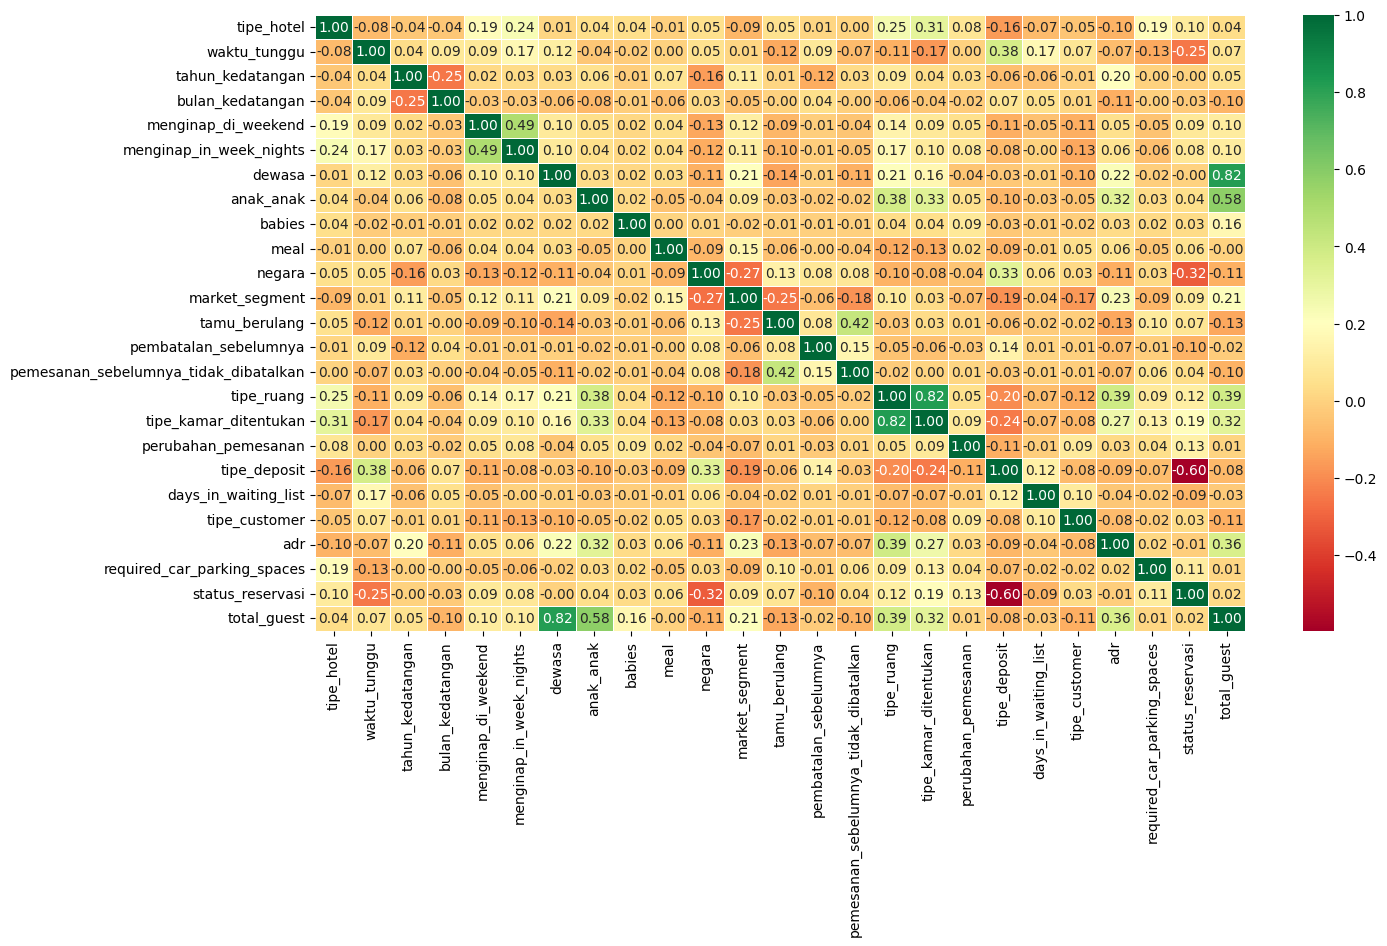

In [107]:
# Melakukan perhitungan nilai korelasi dengan mengasumsikan data adalah data interval.
sns.heatmap(df.corr(),linewidths=.5,annot=True,cmap='RdYlGn',fmt='.2f')
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

In [108]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = df.corr()["status_reservasi"].sort_values()
korelasi

tipe_deposit                            -0.595891
negara                                  -0.320172
waktu_tunggu                            -0.247302
pembatalan_sebelumnya                   -0.098486
days_in_waiting_list                    -0.094650
bulan_kedatangan                        -0.025077
adr                                     -0.010293
dewasa                                  -0.003417
tahun_kedatangan                        -0.003288
total_guest                              0.023853
babies                                   0.028502
tipe_customer                            0.029631
pemesanan_sebelumnya_tidak_dibatalkan    0.037888
anak_anak                                0.040889
meal                                     0.056211
tamu_berulang                            0.066632
menginap_in_week_nights                  0.078026
menginap_di_weekend                      0.085986
market_segment                           0.094783
tipe_hotel                               0.097592


#### FEATURE ENGINEERING

In [109]:
# Menambahkan variabel baru dari beberapa variabel yang sudah ada
df['jumlah_anak']=df['anak_anak']+df['babies']
df['total_menginap']=df['menginap_in_week_nights']+df['menginap_di_weekend']

df.drop(columns=['anak_anak', 'babies', 'menginap_in_week_nights', 'menginap_di_weekend'], inplace=True)

In [110]:
df.head()

,tipe_hotel,waktu_tunggu,tahun_kedatangan,bulan_kedatangan,dewasa,meal,negara,market_segment,tamu_berulang,pembatalan_sebelumnya,...,perubahan_pemesanan,tipe_deposit,days_in_waiting_list,tipe_customer,adr,required_car_parking_spaces,status_reservasi,total_guest,jumlah_anak,total_menginap
0,1,342,0,5,2,0,135,3,0,0,...,3,0,0,2,0,0,1,2,0,0
1,1,737,0,5,2,0,135,3,0,0,...,4,0,0,2,0,0,1,2,0,0
2,1,7,0,5,1,0,59,3,0,0,...,0,0,0,2,75,0,1,1,0,1
3,1,13,0,5,1,0,59,2,0,0,...,0,0,0,2,75,0,1,1,0,1
4,1,14,0,5,2,0,59,6,0,0,...,0,0,0,2,98,0,1,2,0,2


In [111]:
df.describe()

,tipe_hotel,waktu_tunggu,tahun_kedatangan,bulan_kedatangan,dewasa,meal,negara,market_segment,tamu_berulang,pembatalan_sebelumnya,...,perubahan_pemesanan,tipe_deposit,days_in_waiting_list,tipe_customer,adr,required_car_parking_spaces,status_reservasi,total_guest,jumlah_anak,total_menginap
count,118488.000000,118488.000000,118488.000000,118488.000000,118488.000000,118488.000000,118488.000000,118488.000000,118488.000000,118488.000000,...,118488.000000,118488.000000,118488.000000,118488.000000,118488.000000,118488.000000,118488.000000,118488.000000,118488.000000,118488.000000
mean,0.336253,104.461093,1.156438,5.492236,1.860948,0.554883,92.966435,4.932094,0.031370,0.087663,...,0.218579,0.125540,2.335359,2.136748,101.821847,0.038924,0.769909,1.973103,0.112155,3.431394
std,0.472429,107.002246,0.707672,3.537597,0.574943,1.067257,44.658241,1.263136,0.174317,0.847402,...,0.638321,0.335408,17.650601,0.577347,50.428434,0.196960,0.420893,0.718496,0.413106,2.541859
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,18.000000,1.000000,2.000000,2.000000,0.000000,56.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,69.000000,0.000000,1.000000,2.000000,0.000000,2.000000
50%,0.000000,70.000000,1.000000,6.000000,2.000000,0.000000,81.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,95.000000,0.000000,1.000000,2.000000,0.000000,3.000000
75%,1.000000,161.000000,2.000000,8.000000,2.000000,0.000000,135.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,126.000000,0.000000,1.000000,2.000000,0.000000,4.000000
max,1.000000,737.000000,2.000000,11.000000,55.000000,4.000000,176.000000,7.000000,1.000000,26.000000,...,18.000000,2.000000,391.000000,3.000000,5400.000000,8.000000,1.000000,55.000000,10.000000,69.000000


In [112]:
#scaling
transformation_svm = MinMaxScaler().fit(df[['waktu_tunggu', 'tahun_kedatangan', 'bulan_kedatangan',
       'dewasa', 'meal', 'negara', 'market_segment',
       'pembatalan_sebelumnya', 'pemesanan_sebelumnya_tidak_dibatalkan',
       'tipe_ruang', 'tipe_kamar_ditentukan', 'perubahan_pemesanan',
       'tipe_deposit', 'days_in_waiting_list', 'tipe_customer', 'adr',
       'required_car_parking_spaces', 'total_guest',
       'jumlah_anak', 'total_menginap']])
df[['waktu_tunggu', 'tahun_kedatangan', 'bulan_kedatangan',
       'dewasa', 'meal', 'negara', 'market_segment',
       'pembatalan_sebelumnya', 'pemesanan_sebelumnya_tidak_dibatalkan',
       'tipe_ruang', 'tipe_kamar_ditentukan', 'perubahan_pemesanan',
       'tipe_deposit', 'days_in_waiting_list', 'tipe_customer', 'adr',
       'required_car_parking_spaces', 'total_guest',
       'jumlah_anak', 'total_menginap']]=transformation_svm.transform(df[['waktu_tunggu', 'tahun_kedatangan', 'bulan_kedatangan',
       'dewasa', 'meal', 'negara', 'market_segment',
       'pembatalan_sebelumnya', 'pemesanan_sebelumnya_tidak_dibatalkan',
       'tipe_ruang', 'tipe_kamar_ditentukan', 'perubahan_pemesanan',
       'tipe_deposit', 'days_in_waiting_list', 'tipe_customer', 'adr',
       'required_car_parking_spaces', 'total_guest',
       'jumlah_anak', 'total_menginap']])

df.head()

,tipe_hotel,waktu_tunggu,tahun_kedatangan,bulan_kedatangan,dewasa,meal,negara,market_segment,tamu_berulang,pembatalan_sebelumnya,...,perubahan_pemesanan,tipe_deposit,days_in_waiting_list,tipe_customer,adr,required_car_parking_spaces,status_reservasi,total_guest,jumlah_anak,total_menginap
0,1,0.464043,0.0,0.454545,0.036364,0.0,0.767045,0.428571,0,0.0,...,0.166667,0.0,0.0,0.666667,0.001110,0.0,1,0.018519,0.0,0.000000
1,1,1.000000,0.0,0.454545,0.036364,0.0,0.767045,0.428571,0,0.0,...,0.222222,0.0,0.0,0.666667,0.001110,0.0,1,0.018519,0.0,0.000000
2,1,0.009498,0.0,0.454545,0.018182,0.0,0.335227,0.428571,0,0.0,...,0.000000,0.0,0.0,0.666667,0.014983,0.0,1,0.000000,0.0,0.014493
3,1,0.017639,0.0,0.454545,0.018182,0.0,0.335227,0.285714,0,0.0,...,0.000000,0.0,0.0,0.666667,0.014983,0.0,1,0.000000,0.0,0.014493
4,1,0.018996,0.0,0.454545,0.036364,0.0,0.335227,0.857143,0,0.0,...,0.000000,0.0,0.0,0.666667,0.019238,0.0,1,0.018519,0.0,0.028986


#### MODELING

In [113]:
X = df.drop('status_reservasi', axis=1)
y = df['status_reservasi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X Train : ", len(X_train))
print("y Train : ", len(y_train))
print("X Test : ", len(X_test))
print("t Test : ", len(y_test))

X Train :  82941
y Train :  82941
X Test :  35547
t Test :  35547


In [114]:
Input = sm.add_constant(X_train)

In [115]:
model = sm.Logit(y_train, X_train, missing='drop')
result = model.fit()
print(result.summary2())

         Current function value: 0.344122
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         Results: Logit
Model:                          Logit                      Method:                     MLE       
Dependent Variable:             status_reservasi           Pseudo R-squared:           0.362     
Date:                           2024-05-08 16:35           AIC:                        57127.5957
No. Observations:               82941                      BIC:                        57332.7652
Df Model:                       21                         Log-Likelihood:             -28542.   
Df Residuals:                   82919                      LL-Null:                    -44714.   
Converged:                      0.0000                     LLR p-value:                0.0000    
No. Iterations:                 35.0000                    Scale:                      1.0000    
-------------------------------------------------------------------------------------------------
                                        Coef.    Std.Err.     

#### EVALUATION

In [116]:
X = df.drop('status_reservasi', axis=1)
y = df['status_reservasi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X Train : ", len(X_train))
print("y Train : ", len(y_train))
print("X Test : ", len(X_test))
print("t Test : ", len(y_test))

X Train :  82941
y Train :  82941
X Test :  35547
t Test :  35547


Stats Model

In [117]:
Input = sm.add_constant(X_train)

In [118]:
model = sm.Logit(y_train, X_train, missing='drop')
result = model.fit()
print(result.summary2())

         Current function value: 0.344122
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         Results: Logit
Model:                          Logit                      Method:                     MLE       
Dependent Variable:             status_reservasi           Pseudo R-squared:           0.362     
Date:                           2024-05-08 16:35           AIC:                        57127.5957
No. Observations:               82941                      BIC:                        57332.7652
Df Model:                       21                         Log-Likelihood:             -28542.   
Df Residuals:                   82919                      LL-Null:                    -44714.   
Converged:                      0.0000                     LLR p-value:                0.0000    
No. Iterations:                 35.0000                    Scale:                      1.0000    
-------------------------------------------------------------------------------------------------
                                        Coef.    Std.Err.     

In [119]:
# odds ratio
round(np.exp(result.params), 3)

tipe_hotel                               6.490000e-01
waktu_tunggu                             5.360000e-01
tahun_kedatangan                         5.540000e-01
bulan_kedatangan                         9.420000e-01
dewasa                                   8.778081e+99
meal                                     1.226000e+00
negara                                   9.700000e-02
market_segment                           7.560000e-01
tamu_berulang                            2.340000e+00
pembatalan_sebelumnya                    2.900000e-02
pemesanan_sebelumnya_tidak_dibatalkan    3.963300e+01
tipe_ruang                               3.000000e-02
tipe_kamar_ditentukan                    2.063860e+02
perubahan_pemesanan                      9.685952e+04
tipe_deposit                             1.000000e-03
days_in_waiting_list                     2.590000e-01
tipe_customer                            7.400000e-01
adr                                      0.000000e+00
required_car_parking_spaces 

### LOAD AND PREDICT NEW DATA

In [120]:
prediction = result.predict(X_test)

In [121]:
pred_results = pd.DataFrame(prediction, columns = ["logreg_pred"])
pred_results["prediksi"] = pred_results['logreg_pred'].apply(lambda x: 1 if x > 0.5 else 0)
pred_results['actual'] = y_test
pred_results.head()

,logreg_pred,prediksi,actual
5725,0.948357,1,1
43995,0.779674,1,1
40686,0.978156,1,1
78689,0.969153,1,1
69055,0.057928,0,0


In [122]:
print('Test accuracy =  {:.3f}'.format(accuracy_score(pred_results['actual'], pred_results["prediksi"])))
print('Test precision =  {:.3f}'.format(precision_score(pred_results['actual'], pred_results["prediksi"], average='binary')))
print('Test recall =  {:.3f}'.format(recall_score(pred_results['actual'], pred_results["prediksi"], average='binary')))
print('Test f-score =  {:.3f}'.format(f1_score(pred_results['actual'], pred_results["prediksi"], average='binary')))

Test accuracy =  0.869
Test precision =  0.867
Test recall =  0.981
Test f-score =  0.920


**Sklearn (logistic regression)**

In [123]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [124]:
y_pred = LR.predict(X_test)
logreg_test = pd.merge(X_test, y_test, left_index=True, right_index=True, how='outer')
logreg_test['prediction'] = y_pred
logreg_test.head()

,tipe_hotel,waktu_tunggu,tahun_kedatangan,bulan_kedatangan,dewasa,meal,negara,market_segment,tamu_berulang,pembatalan_sebelumnya,...,tipe_deposit,days_in_waiting_list,tipe_customer,adr,required_car_parking_spaces,total_guest,jumlah_anak,total_menginap,status_reservasi,prediction
5725,1,0.320217,0.5,0.727273,0.036364,0.0,0.335227,0.571429,0,0.0,...,0.0,0.0,1.000000,0.009989,0.0,0.018519,0.0,0.043478,1,1
43995,0,0.261872,0.0,1.000000,0.036364,0.0,0.698864,0.857143,0,0.0,...,0.0,0.0,0.666667,0.028672,0.0,0.018519,0.0,0.057971,1,1
40686,0,0.161465,0.0,0.090909,0.036364,0.0,0.454545,0.857143,0,0.0,...,0.0,0.0,0.666667,0.015168,0.0,0.018519,0.0,0.028986,1,1
78689,0,0.000000,0.0,0.818182,0.018182,0.0,0.767045,0.285714,1,0.0,...,0.0,0.0,0.666667,0.013134,0.0,0.000000,0.0,0.043478,1,1
69055,0,0.245590,1.0,0.727273,0.036364,0.0,0.767045,0.571429,0,0.0,...,0.5,0.0,0.666667,0.025157,0.0,0.018519,0.0,0.028986,0,0


In [125]:
print('Accuracy of logistic regression classifier train data: {:.3f}'.format(LR.score(X_train, y_train)))
print('Accuracy of logistic regression classifier test data: {:.3f}'.format(LR.score(X_test, y_test)))

Accuracy of logistic regression classifier train data: 0.871
Accuracy of logistic regression classifier test data: 0.870


### KESIMPULAN/SARAN

1. Jika dilihat dari oods ratio pemesan
yang melakukan pembatalan sebelumnya, peluang pembatalan reservasi lebih rendah jika reservasi sebelumnya tidak dibatalkan. Kemudian jika dilihat pada Crosstab dapat dilihat yang tidak melakukan pembatalan sebelumnya memiliki peluang untuk tidak melakukan pembatalan saat ini(Check-Out). Oleh karena itu, Perusahaan juga harus berhati-hati dalam menerima pemesanan yang dulunya pernah melakukan pembatalan karena cenderung akan melakukan pembatalan kembali.

2. Dilihat dari oods ratio, peluang pembatalan reservasi lebih rendah untuk tamu dari negara tertentu. Kemudian dilihat dari hasil crosstab, negara dengan kecenderungan melakukan pembatalan adalah Negara Portugal dengan jumlah pembatalan 20.972. oleh karena itu, Perusahaan harus berhati-hati pada pemesan yang berasal dari Portugal.

3. Dilihat dari keseluruhan oods ratio,pemesan yang melakukan perubahan pemesanan dengan oOd ratio sebesar 9.7, ini menunjukkan bahwa peluang pembatalan reservasi sangat meningkat ketika terjadi perubahan pemesanan. Oleh karena itu, Perusahaan harus berhati-hati dengan pemesan yang melakukan perubahan berkali-kali karena berpeluang sangat tinggi melakukan pembatalan pemesanan.